# Portfolio Theory

This code, provided by professor [Tiziana Ciano](https://www.linkedin.com/in/tiziana-ciano-2b817b14a/), has been optimized/updated after Yahoo Finance new update concerning MultiIndex issues and it's used for studying diversification of shares in a financial portfolio compraed to an energy portfolio.


## Defense portfolio

C:\Users\krist\AppData\Local\Temp\ipykernel_16116\2950850970.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']
[*********************100%***********************]  5 of 5 completed
C:\Users\krist\AppData\Local\Temp\ipykernel_16116\2950850970.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()    # daily returns


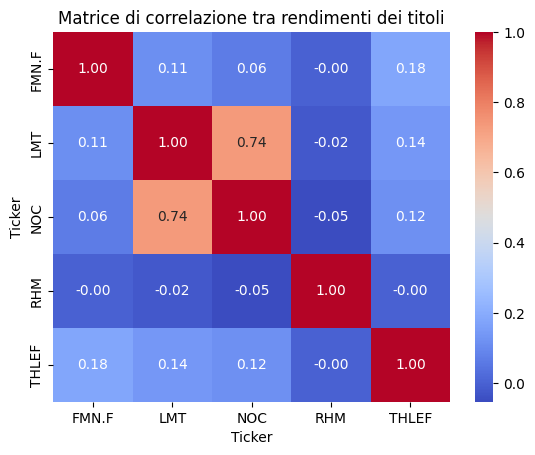

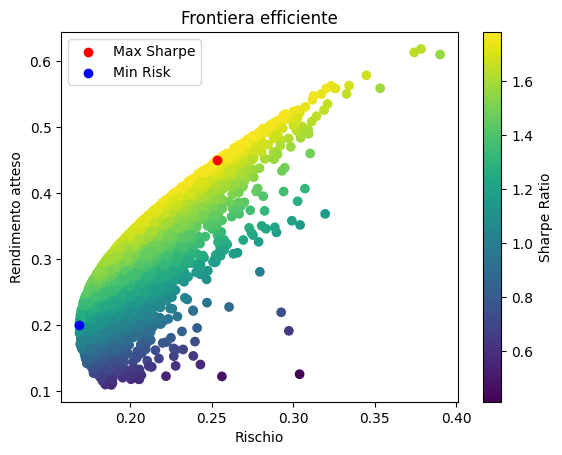

Portafoglio con massimo Sharpe Ratio:
 Rendimento atteso: 45.09%
 Rischio: 25.32%

Portafoglio con rischio minimo:
 Rendimento atteso: 20.08%
 Rischio: 16.87%


In [7]:
# import libraaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# shares included in portfolio
tickers = ['LMT', 'RHM', 'NOC', 'THLEF', 'FMN.F']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()    # daily returns
mean_returns = returns.mean() * 252     # mean annual returns
cov_matrix = returns.cov() * 252        # annual covariance matrix
correlation_matrix = returns.corr()     # annual correlation matrix
num_portfolios = 10000                  # num of simulations

# visualize correlation matrix
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione tra rendimenti dei titoli')
plt.show()

# prepare arrays for results
results = np.zeros((3, num_portfolios))
weights_record = []

# simulations or random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    # calculate sharp ratio and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # save results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

# convert results in DF (DataFrame)
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()

# print details of ptimized portfolios
print("Portafoglio con massimo Sharpe Ratio:")
print(f" Rendimento atteso: {max_sharpe_portfolio['Return']:.2%}")
print(f" Rischio: {max_sharpe_portfolio['Risk']:.2%}")
print()
print("Portafoglio con rischio minimo:")
print(f" Rendimento atteso: {min_risk_portfolio['Return']:.2%}")
print(f" Rischio: {min_risk_portfolio['Risk']:.2%}")


## Eneregetics Portfolio

C:\Users\krist\AppData\Local\Temp\ipykernel_16116\2351685735.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']
[*********************100%***********************]  15 of 15 completed
C:\Users\krist\AppData\Local\Temp\ipykernel_16116\2351685735.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


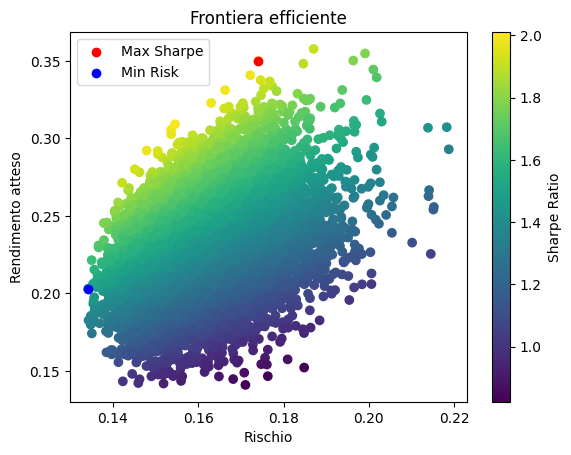

In [ ]:
# import libraaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# shares included in portfolio
tickers = ['XOM', 'CVX', 'SHEL', 'BP', 'ENL.DE']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_portfolios = 10000

results = np.zeros((3, num_portfolios))
weights_record = []

# calculations
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()


## Tech Portfolio

C:\Users\krist\AppData\Local\Temp\ipykernel_30236\826761819.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']
[*********************100%***********************]  5 of 5 completed


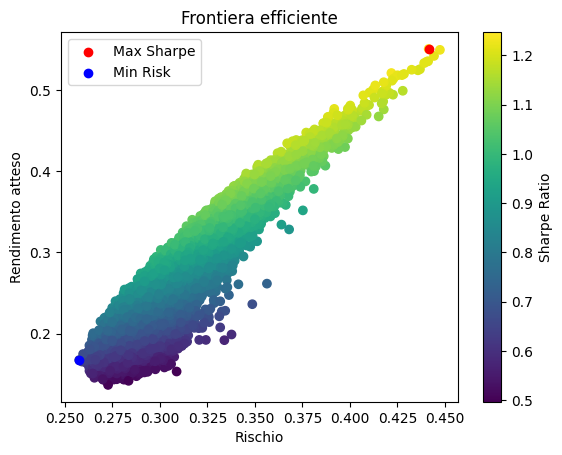

In [6]:
# import libraaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# shares included in portfolio
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN']

# download adjusted data for each ticker
data = yf.download(tickers, start='2022-02-24', end='2025-07-01')['Close']

# MuliIndex fix --> new update of yfinance
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_portfolios = 10000

results = np.zeros((3, num_portfolios))
weights_record = []

# calculations
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev  # Sharpe Ratio

results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# max return and min risk
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.loc[min_risk_idx]

# graph plot
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Max Sharpe')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Min Risk')
plt.title('Frontiera efficiente')
plt.xlabel('Rischio')
plt.ylabel('Rendimento atteso')
plt.legend()
plt.show()
